# X-ray Module

**Lecturer:** Brad Cenko<br>
**Jupyter Notebook Author:** Brad Cenko, Dipankar Bhattacharya & Cameron Hummels

This is a Jupyter notebook lesson taken from the GROWTH Summer School 2019.  For other lessons and their accompanying lectures, please see: http://growth.caltech.edu/growth-school-2019.html

## Objective
Learn how to analyze x-ray data

## Key steps
- Search for gamma-ray bursts in data from the AstroSat CZTI
- Search for a periodic signal in data of the Crab Nebula from AstroSat LAXPC

## Required dependencies

See GROWTH school webpage for detailed instructions on how to install these modules and packages.  Nominally, you should be able to install the python modules with `pip install <module>`.  The external astromatic packages are easiest installed using package managers (e.g., `rpm`, `apt-get`).

### Python modules
* python 3
* astropy
* numpy
* scipy
* matplotlib

### External packages
None.

### Load modules

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sc
import os

# Load event file with astropy

Data from X-ray instruments are typically stored as *event* files - binary FITS tables with a list of photons detected (including time, location on the detector, and photon energy).  Here we will start off by reading in one of these event files (in this case referred to as a "Level 2" event file because some cleaning has been done to filter for astrophysical photons) from the Cadmium Zinc Telluride Imager (CZTI) on the AstroSat satellite.

In [2]:
filename = os.path.join('data', 'AS1A02_005T01_9000000948_06884cztM0_level2_common_clean.evt')

dataHDU = fits.open(filename)

Here's what one of these event files looks like.

In [3]:
dataHDU[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   33 / width of table in bytes                        
NAXIS2  =               477590 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   12 / number of fields in each row                   
TTYPE1  = 'Time    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'CZTSECCNT'          / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'CZTNTICK'        

You can see that this was an observation of the bright AGN Mrk421 ("OBJECT" keyword) obtained on January 5 2017 ("DATE-OBS" keyword), with a total elapsed time of 6975 s ("TELAPSE" keyword) and an exposure time of 3943 s ("EXPOSURE" keyword).  Now let's look at the actual data in the binary table.  The attribute "dtype" describes the columns in a FITS record array.

In [4]:
dataHDU[1].data.dtype

dtype((numpy.record, [('Time', '>f8'), ('CZTSECCNT', '>f8'), ('CZTNTICK', '>i2'), ('PHA', '>i2'), ('DetID', 'u1'), ('pixID', 'u1'), ('DETX', 'u1'), ('DETY', 'u1'), ('veto', '>i2'), ('alpha', 'u1'), ('PI', '>i2'), ('ENERGY', '>f4')]))

### Combine data from all quadrants

CZTI contains four quadrants, here we obtain the time value for each quadrant and combine the data for them.  Since the FITS tables are a list of detected photons, combining the list of times effectively produces a list of the times of all photons observed by the detector.

In [5]:
times = np.concatenate((dataHDU[1].data['Time'], dataHDU[2].data['Time'],
                        dataHDU[3].data['Time'], dataHDU[4].data['Time']))

### Make histogram and plot light curve

To generate a light curve, we can just create a histogram of the times of photon arrival from the four quadrants.  Defining the bin size (in this case 5 s) will significantly impact the appearance of the light curve.   

/home/growth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  # Remove the CWD from sys.path while we load stuff.


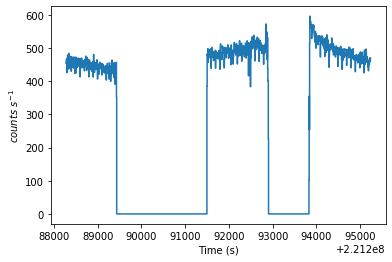

In [6]:
# Define timebins
binsize = 5  
tbins = np.arange(times.min(), times.max(), binsize)

# Make histogoram
counts, bins = np.histogram(times, bins=tbins)
bins = (bins[1:] + bins[:-1])/2

# Plot
plt.plot(bins, counts/binsize, ls='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')
plt.show()

# Searching for GRB170105A in Data

*Student Exercises*: From other high-energy detectors, we know that a GRB occured at UTC 2017 Jan 5 06:14:06 (GRB170105A), corresponding to a mission time of ~ 221292850.  

Part 1: Did the CZTI see a GRB at this time?  Plot the four-quadrant light curve around this time window with a variety of different bin sizes to see if there is any evidence for a GRB at this time.

/home/growth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


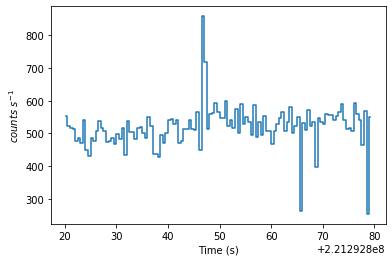

In [7]:
binsize =0.5
tbins = np.arange(221292820.0, 221292880.0, binsize)

counts, bins = np.histogram(times, bins=tbins)
bins = (bins[1:] + bins[:-1])/2


plt.plot(bins, counts/binsize, ls='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')
plt.show()

Part 2: Estimate the duration of GRB170105A in the CZTI bandpass (i.e., how long was there signal above the background level)?

/home/growth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


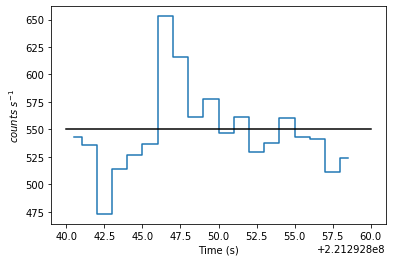

In [8]:
binsize =1.0
tbins = np.arange(221292840.0, 221292860.0, binsize)

counts, bins = np.histogram(times, bins=tbins)
bins = (bins[1:] + bins[:-1])/2


plt.plot(bins, counts/binsize, ls='steps-mid')
plt.plot([221292840.0, 221292860.0], [550.0, 550.0], "k")
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')
plt.show()
# Approximately 4 bins above background, so ~ 4 s.

# Searching for the Crab Pulsar

We will look at observations obtained by the Large Area X-ray Proportional Counter (LAXPC) instrument on AstroSat to see if we can measure pulsations from the Crab pulsar.  We need following files for this tutorial:<br> 
1) A LAXPC events file without barycenter correction.<br>
2) An event file with barycenter correction.<br>
3) A GTI file (which contains the good time start and stop time values).<br>
The files can be open in the same format as described in the example below.<br>
GTI = Good Time Interval

In [9]:
fevents=fits.open("data/ObsID406_02741_event.fits")
fevents_bary=fits.open("data/ObsID406_02741_laxpc_bary.fits")
fgti=fits.open('data/ObsID406_02741_laxpc1_bary.gti')

# Some information about fits file

From the files we can obtain informations like the length, header etc.

In [10]:
fevents_bary[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   18 / width of table in bytes                        
NAXIS2  =             13614384 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'TIME    '           / Time elapsed since MJDREF                      
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'Channel '           / label for field   2                            
TFORM2  = 'I2      '        

# Change in time after barycenter correction

For accurate timing analysis, we need to put all the observations times onto a common reference system.  This is typically referenced to the frame of the Sun / Solar System, and is called a barycenter correction.  Here the correction has been applied for us by the AstroSat pipeline.  Observe the time difference between the data from the event file and barycenter correction file.

In [11]:
time=fevents[1].data['TIME']
time_bary=fevents_bary[1].data['TIME']
time_diff=time[0]- time_bary[0]
time_diff

73.24125623703003

# Lightcurve without GTI

In addition to the barycenter correction, we need to account for the fact that only a fraction of the data is obtained during so-called "Good Time Intervals (GTIs)".  This could be due to time periods of elevated background (e.g., passage through the South Atlantic Anomaly), or simply because the target location is occulted by Earth.

First lets plot the light curve without applying gti cuts. This plot will consist of both gti(good time interval) data as well as bti (bad time interval) data. We can compare the two light curves obtained before and after applying gti cuts.

/home/growth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  # Remove the CWD from sys.path while we load stuff.


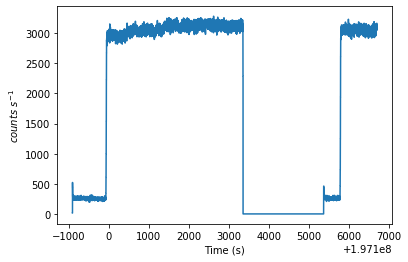

In [12]:
# Define timebins
binsize = 1
tbins = np.arange(time_bary.min(), time_bary.max(), binsize)

# Make histogoram
counts_time, t_bins = np.histogram(time_bary, bins=tbins)
t_bins = (t_bins[1:] + t_bins[:-1])/2

# Plot
plt.plot(t_bins, counts_time/binsize, ls='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')
plt.show()

# applying GTI

Read and filter event file to keep in array only events within the good time interval.  You can see from the plot above that there are two good time intervals in the above data set.

In [13]:
gtidata=fgti[1].data
gtidata

FITS_rec([(1.97099975e+08, 1.97103300e+08),
          (1.97105810e+08, 1.97106645e+08)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [14]:
t_start=gtidata[0][0],gtidata[1][0]
t_stop=gtidata[0][1],gtidata[1][1]

#  lightcurve after applying GTI

*Student Exercise*: Using the GTIs defined above, plot the light curve in the second good time interval.

/home/growth/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  del sys.path[0]


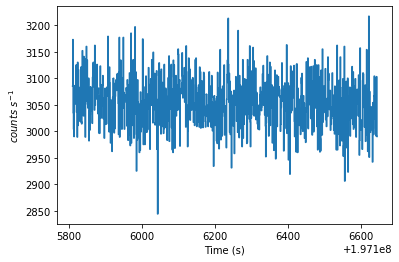

In [15]:
eventsdata=fevents_bary[1].data
time_gti = time_bary[np.where((time_bary>=t_start[1]) & (time_bary<=t_stop[1]))]
    
# Define timebins
binsize = 1
tbins = np.arange(time_gti.min(), time_gti.max(), binsize)

# Make histogoram
counts_time, t_bins = np.histogram(time_gti, bins=tbins)
t_bins = (t_bins[1:] + t_bins[:-1])/2

# Plot
plt.plot(t_bins, counts_time/binsize, ls='steps-mid')
plt.xlabel('Time (s)')
plt.ylabel('$counts\ s^{-1}$')
plt.show()

# Calculating Phase and folding

While it is not apparent in the plot above, the X-ray light curves includes a periodic modulation due to the Crab pulsar.

*Student Exercise*: Calculate the power spectrum of the light curve in the second good time interval, and search for periodicity due to the Crab pulsar (hint: the period is ~ 30 Hz)

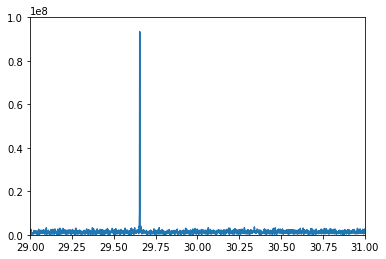

In [16]:
binsize = 0.001
tbins = np.arange(time_gti.min(), time_gti.max(), binsize)
counts_time, t_bins = np.histogram(time_gti, bins=tbins)
t_bins = (t_bins[1:] + t_bins[:-1])/2

import numpy.fft as fft
n = len(counts_time)
T=time_gti.max()-time_gti.min()
frq = np.arange(n)/T

power = fft.fft(counts_time/binsize)
plt.plot(frq, abs(power))
plt.xlim(29.0, 31.0)
plt.ylim(0.0, 0.1e9)
plt.show()

With the period in hand, we can calculate a phase folded light curve to measure the pulse profile.  We can use the period measured above (P = 29.655 Hz) to perform the phase folding.

*Student exercise*: Fold the light curve above at the period of the Crab pulsar to determine the pulse profile.  Hint: use the following period: 29.6553306828504

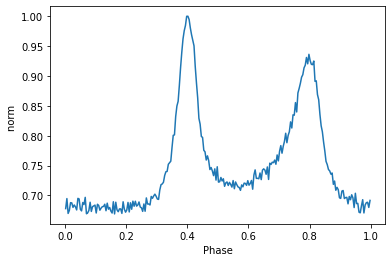

In [17]:
tref=fevents_bary[1].header['MJDREFI']
tref=tref*86400
time_current =time_gti + tref
T0=57480.5635028439*86400 # Reference Epoch for which nu is known
t_phase=time_current-T0

# freq
nu = 29.6553306828504

#calculating phase
phi=t_phase*nu
phi_int=np.zeros(len(phi))
for i in range(len(phi)):
    phi_int[i]= int(phi[i])
phase=phi - phi_int
phase=phase+1
min(phase),max(phase)

#folding phase
no_bins=250
pbins=np.linspace(0.,1.,no_bins+1)
phase_counts, pbin_edges = np.histogram(phase,bins=pbins)
pbin_edges = (pbin_edges[1:] + pbin_edges[:-1])/2
phase_counts=[float(i) for i in phase_counts]
phase_counts=np.array(phase_counts)
pcounts=phase_counts/max(phase_counts) # normalising 
plt.plot(pbin_edges, pcounts) # plotting pulse profile
plt.xlabel('Phase')
plt.ylabel('norm ')
plt.show()
